## Producto Interior Bruto (PIB)

Porcentaje de variación del PIB anual de Mexico

- DataFrame --> df_PIB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def limpieza_indicadores(root):
    "limpieza del fichero inicial de cada indicador económico. Base de datos del Banco Mundial"
    
    df = pd.read_csv(root, header=0)
    df.rename(columns={'Country Name':'country', 'Indicator Name':'variables' }, inplace=True)
    df = df[df.country == 'México']
    df['country'] = df['country'].replace('México', 'MEXICO')
    df = df.drop(['country', 'Country Code', 'Indicator Code'], axis=1)
    
    
    return df

In [3]:
root_PIB = "Variables_economicas/PIB.csv"
df_PIB = limpieza_indicadores(root_PIB)
df_PIB = df_PIB.round(2)
df_PIB = df_PIB.replace({'Crecimiento del PIB (% anual)': 'PIB(%anual)'})
df_PIB.set_index('variables', inplace=True)

df_PIB.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
PIB(%anual),1.94,4.94,-6.29,6.77,6.85,5.16,2.75,4.94,-0.4,-0.04,...,3.66,3.64,1.35,2.85,3.29,2.63,2.11,2.19,-0.05,NaN


In [4]:
df_PIB = df_PIB.transpose()

In [5]:
df_PIB.describe()

variables,PIB(%anual)
count,27.000000
mean,2.360370
std,3.014023
min,-6.290000
25%,1.400000
50%,2.630000
75%,4.210000
max,6.850000


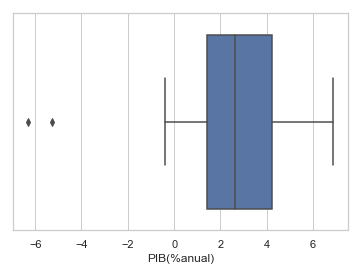

In [6]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_PIB["PIB(%anual)"])

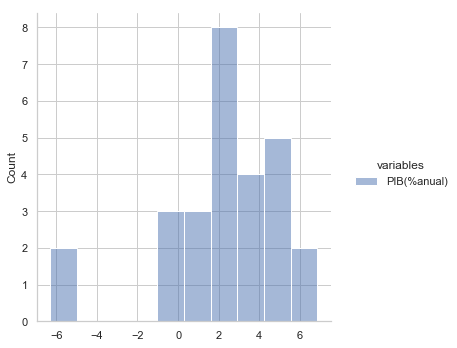

In [7]:
sns.displot(df_PIB, bins=10)

Text(0.5, 1.0, 'Evolución del PIB en México')

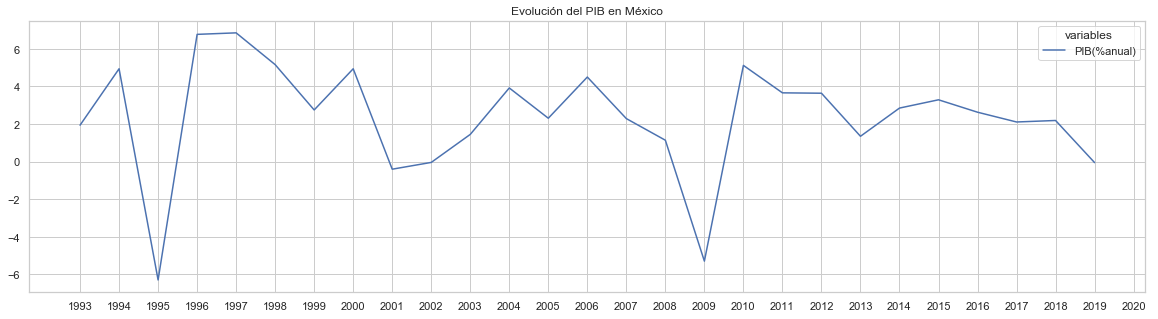

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_PIB)
plt.title('Evolución del PIB en México')

In [10]:
df_PIB.loc[df_PIB['PIB(%anual)'] == df_PIB['PIB(%anual)'].max()]

variables,PIB(%anual)
1997,6.85


In [11]:
df_PIB.loc[df_PIB['PIB(%anual)'] == df_PIB['PIB(%anual)'].min()]

variables,PIB(%anual)
1995,-6.29


In [12]:
%store df_PIB

Stored 'df_PIB' (DataFrame)
